### **Problem Statement**
- A supervised multi-class classification problem objective is to categorize/classifies images into specific Arabic alphabet letters.
- The dataset comprises pixel values representing each image.
- To identify the optimal model , three different models : SVM, KNN, and 2 distinct NN architectures are built.

### **1.Importing Libraries**

In [ ]:
# Helper libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For visualization
import matplotlib.pyplot as plt

# For data spliting
from sklearn.model_selection import train_test_split

# For modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
# For preventing overfitting in NN models
from keras.callbacks import EarlyStopping

# For models evaluation
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### **2.Loading the data**

In [ ]:
# Load the training data
train_images = pd.read_csv("/content/csvTrainImages 13440x1024.csv", header=None)
train_labels = pd.read_csv("/content/csvTrainLabel 13440x1.csv", header=None)

# Load the testing data
test_images = pd.read_csv("/content/csvTestImages 3360x1024.csv", header=None)
test_labels = pd.read_csv("/content/csvTestLabel 3360x1.csv", header=None)

In [ ]:
# Store the classes to use later when plotting the images , since the class names are not included with the dataset.
class_names_arabic = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك',
                          'ل', 'م', 'ن', 'ه', 'و', 'ي']

### **3.Data exploration and preparation**

In [ ]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_labels

,0
0,1
1,1
2,1
3,1
4,1
...,...
13435,28
13436,28
13437,28
13438,28


In [ ]:
test_images

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_labels

,0
0,1
1,1
2,2
3,2
4,3
...,...
3355,26
3356,27
3357,27
3358,28


##### **Cheking for null values**

In [ ]:
train_images.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1019    0
1020    0
1021    0
1022    0
1023    0
Length: 1024, dtype: int64

In [ ]:
train_labels.isnull().sum()

0    0
dtype: int64

In [ ]:
test_images.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1019    0
1020    0
1021    0
1022    0
1023    0
Length: 1024, dtype: int64

In [ ]:
test_labels.isnull().sum()

0    0
dtype: int64

In [ ]:
# Identify the number of unique classes
len(train_labels[0].unique())

28

In [ ]:
# Examine the distribution of samples in each class
train_labels[0].value_counts()

1     480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
15    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
28    480
Name: 0, dtype: int64

### **4.Data Scaling**

In [ ]:
# Normalizing each image to range of 0 to 1
# 255 --> the default number of number of pixels
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# Another way for scaling ( get max. value in each column and divide the cell value by it )
#train_images_normalized = train_images.div(train_images.max(axis=1), axis=0)

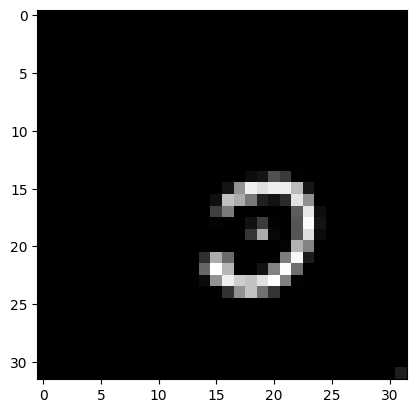

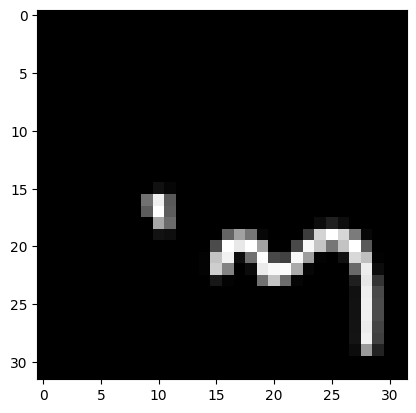

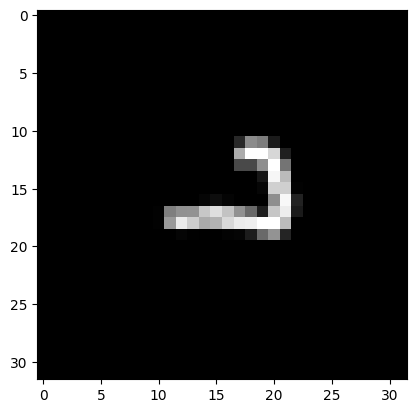

In [ ]:
# A function that reconstructs an image from its flattened vector then displayig it

def display_image(image):
    image_matrix = np.reshape(image, (32, 32))  # Reshape to 32x32
    plt.imshow(image_matrix, cmap='gray' )
    plt.show()

# Use this function to visualize some of the images in the test dataset
num_images_to_visualize = 3
for i in range(num_images_to_visualize):
  random_index = np.random.randint(0, len(test_images_normalized)-1)
  display_image(test_images_normalized.iloc[random_index, :].values)

### **5.Modeling**

### **5.1.SVM**

#### **Training the model**

In [ ]:
# First experiment ( SVM )

# Train an SVM model on the training data
SVM_model =SVC(kernel='poly', degree=2, C=1).fit(train_images_normalized, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### **Testing the model**

In [ ]:
# Test the model
SVM_pred = SVM_model.predict(test_images_normalized)

#### **Evaluating model performance**

In [ ]:
SVM_f1_scores = f1_score(test_labels, SVM_pred, average=None)
print('F1 Scores ( for each class ): \n', SVM_f1_scores)

# Calculate and print the average F1 score
average_svm_f1 = sum(SVM_f1_scores) / len(SVM_f1_scores)
print(f"SVM model : \nAverage F1 Score for all classes : {average_svm_f1:.2f}")

F1 Scores ( for each class ): 
 [0.91056911 0.67910448 0.472      0.49230769 0.58039216 0.54310345
 0.46846847 0.52173913 0.45454545 0.61832061 0.55430712 0.69958848
 0.76651982 0.63519313 0.64317181 0.66141732 0.58986175 0.616
 0.64864865 0.60162602 0.64761905 0.84684685 0.86995516 0.84745763
 0.63035019 0.81512605 0.71900826 0.76777251]
SVM model : 
Average F1 Score for all classes : 0.65


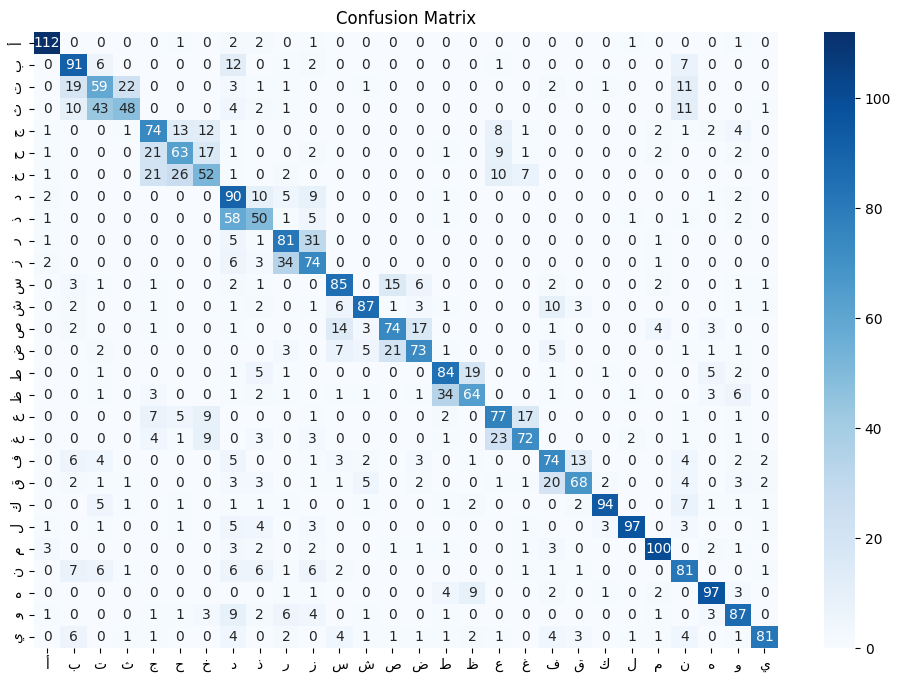

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, SVM_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_arabic, yticklabels=class_names_arabic)
plt.title('Confusion Matrix')
plt.show()

### **Changing data labels**

In [ ]:
# Change data labels from 1 : 28 to 0 : 27 to be suitable for KNN , NN models as their array indices are 0 based
train_labels = train_labels.apply( lambda x : x - 1 )
test_labels = test_labels.apply( lambda x : x - 1 )

### **Spliting into training , validation datasets**

In [ ]:
# Split the training data into training and validation sets
X_train_images, X_val_images, y_train_labels, y_val_labels = train_test_split(train_images_normalized, train_labels, test_size=0.2,
                                                                              random_state=42)


### **5.2.KNN**

#### **Training the model**

In [ ]:
# Second experiment ( KNN )

# Define a range of K values to experiment with
k_values = np.arange(1, 21)

# Experiment with different K values
f1_scores = []

for k in k_values:
    # Training the model on the training dataset part
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_images, y_train_labels)
    # Testing the model predictions on the validation dataset part
    y_val_pred = knn_model.predict(X_val_images)
    f1 = f1_score(y_val_labels, y_val_pred, average='weighted')
    f1_scores.append(f1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

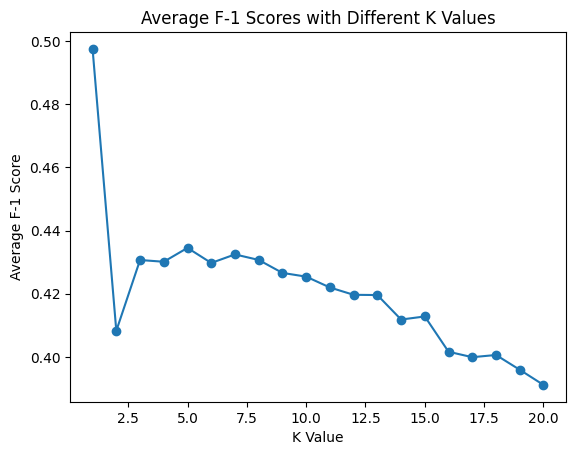

The best K value is : 1


In [ ]:
# Plot the average f-1 scores with different K values
plt.plot(k_values, f1_scores, marker='o')
plt.title('Average F-1 Scores with Different K Values')
plt.xlabel('K Value')
plt.ylabel('Average F-1 Score')
plt.show()

# Find the best K value
best_k = k_values[np.argmax(f1_scores)]
print(f"The best K value is : {best_k}")

#### **Testing the model**

In [ ]:
# Test the model with the best K value
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(train_images_normalized, train_labels)
test_labels_pred = best_model.predict(test_images_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### **Evaluating model performance**

In [ ]:
knn_f1_scores = f1_score(test_labels, test_labels_pred, average='weighted')
print(f"KNN model : \nAverage F-1 Score on Testing Dataset: {knn_f1_scores}")


KNN model : 
Average F-1 Score on Testing Dataset: 0.5607659578147269


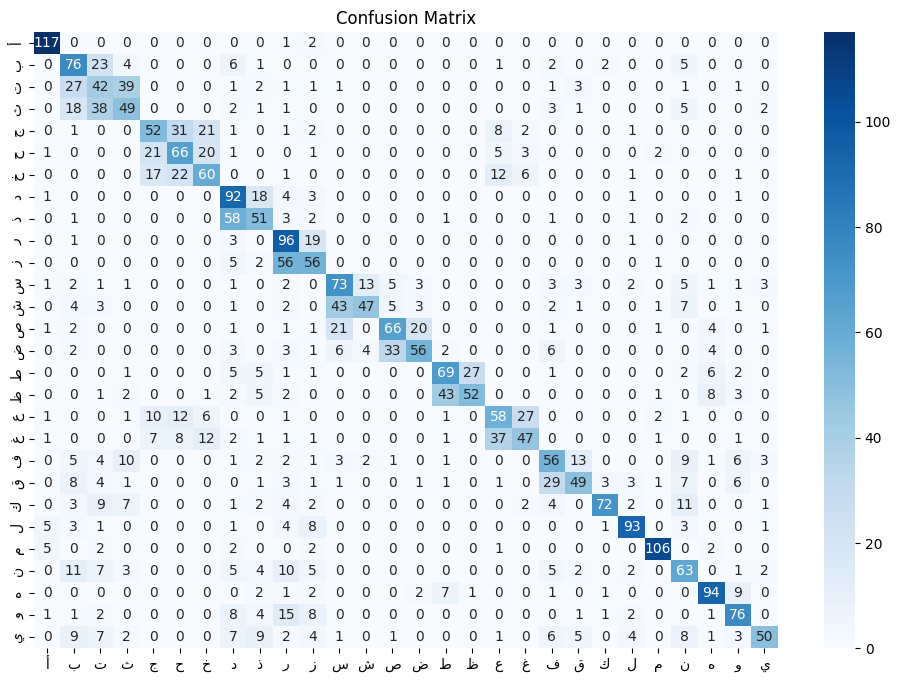

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_labels_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_arabic, yticklabels=class_names_arabic)
plt.title('Confusion Matrix')
plt.show()

### **5.3.Neural Network**

#### **1st NN model**

In [ ]:
# Third experiment ( NN )

# To create a sequential model, which is a linear stack of layers.
# Each dense represents a layer in the NN :
# 1.Input layer --> the size of the train images
# 2. 2 Hidden layer --> the first & second one contains 150 , 60 neurons respectively.
# 3.Output layer --> Each node contains a score indicating the current image belongs to one of the 28 classes
# ( no. of Arabic alphabet letters ).

nn_model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_images.shape[1],)),
    tf.keras.layers.Dense(units=150, activation='relu'),   # 256
    tf.keras.layers.Dense(units=60, activation='relu'),    # 64  tanh  , regularization : 0.001   , CNN model , bigger data
    tf.keras.layers.Dense(28,activation ='softmax')
])

##### **Compile the model**

In [ ]:
# optimizer -->  how the model is updated based on the data it sees and its loss function.
# adam --> Combines ideas from RMSprop and momentum. It adapts the learning rates of each parameter based on their historical gradients.
# loss --> Measures how accurate the model is during training.
# metrices --> Used to monitor the training and testing steps.
# Suitable choice when the labels are integers (class indices).
# As it used in scenarios where the classes are mutually exclusive, and each input belongs to exactly one class.
# The following example uses accuracy, the fraction of the images that are correctly classified.
nn_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### **Training & Testing ( on val dataset ) the model**

In [ ]:
# To prevent overfitting by stopping training when the best validation performance reached
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model1 = nn_model1.fit(X_train_images, y_train_labels, epochs=50, validation_data=(X_val_images, y_val_labels), callbacks=[early_stopping])

Epoch 1/50
336/336 [==============================] - 4s 10ms/step - loss: 2.4410 - accuracy: 0.2706 - val_loss: 1.8900 - val_accuracy: 0.3925
Epoch 2/50
336/336 [==============================] - 2s 6ms/step - loss: 1.5237 - accuracy: 0.5251 - val_loss: 1.4306 - val_accuracy: 0.5283
Epoch 3/50
336/336 [==============================] - 2s 6ms/step - loss: 1.0961 - accuracy: 0.6457 - val_loss: 1.2137 - val_accuracy: 0.6027
Epoch 4/50
336/336 [==============================] - 2s 5ms/step - loss: 0.8582 - accuracy: 0.7194 - val_loss: 1.0669 - val_accuracy: 0.6276
Epoch 5/50
336/336 [==============================] - 2s 6ms/step - loss: 0.6911 - accuracy: 0.7741 - val_loss: 1.0328 - val_accuracy: 0.6540
Epoch 6/50
336/336 [==============================] - 2s 6ms/step - loss: 0.5669 - accuracy: 0.8180 - val_loss: 0.9772 - val_accuracy: 0.6726
Epoch 7/50
336/336 [==============================] - 3s 9ms/step - loss: 0.4762 - accuracy: 0.8497 - val_loss: 0.9507 - val_accuracy: 0.6782
Epoch

##### **Evaluating model performance**

In [ ]:
val_loss, val_acc = nn_model1.evaluate(X_val_images,  y_val_labels)

print('\nTesting loss on validation dataset:', val_loss)
print('\nTesting accuracy on validation dataset:', val_acc)

84/84 [==============================] - 0s 4ms/step - loss: 0.9433 - accuracy: 0.7001

Testing loss on validation dataset: 0.9433099031448364

Testing accuracy on validation dataset: 0.7001488208770752


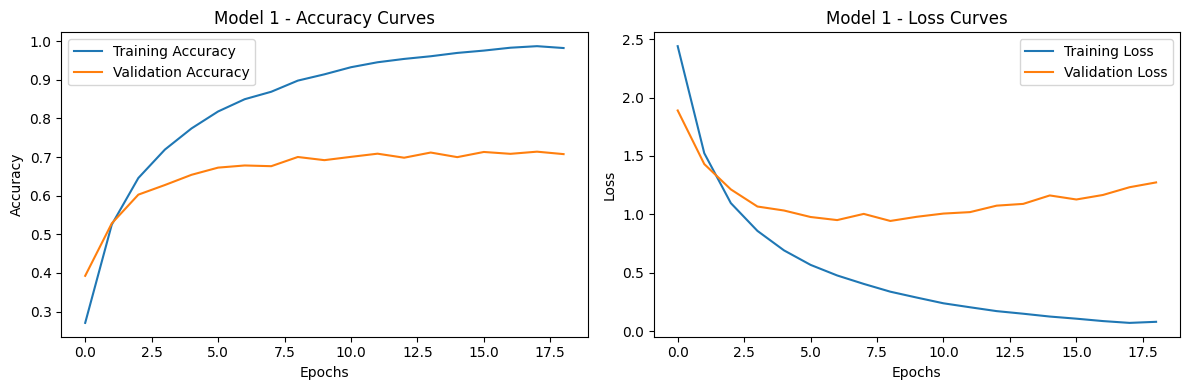

In [ ]:
# Plot the error and accuracy curves for the training data and validation data.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model1.history['accuracy'], label='Training Accuracy')
plt.plot(model1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Model 1 - Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(model1.history['loss'], label='Training Loss')
plt.plot(model1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Model 1 - Loss Curves')

plt.tight_layout()
plt.show()

#### **2nd NN model**

In [ ]:
# Third experiment ( NN )

# To create a sequential model, which is a linear stack of layers.
# Each dense represents a layer in the NN:
# 1.Input layer --> the size of the train images
# 2. 4 Hidden layer --> the first , second , third & fourth ones contains 200 , 140 , 100 , 40 neurons respectively.
# 3.Output layer --> Each node contains a score indicating the current image belongs to one of the 28 classes
# ( no. of Arabic alphabet letters ).

nn_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_images.shape[1],)),
    tf.keras.layers.Dense(units=200, activation='tanh'),
    tf.keras.layers.Dense(units=140, activation='tanh'),
    tf.keras.layers.Dense(units=100, activation='tanh'),
    tf.keras.layers.Dense(units=40, activation='tanh'),
    tf.keras.layers.Dense(28,activation ='softmax')
])

##### **Compile the model**

In [ ]:
# optimizer -->  how the model is updated based on the data it sees and its loss function.
# adam --> Combines ideas from RMSprop and momentum. It adapts the learning rates of each parameter based on their historical gradients.
# loss --> Measures how accurate the model is during training.
# metrices --> Used to monitor the training and testing steps.
# Suitable choice when the labels are integers (class indices).
# As it used in scenarios where the classes are mutually exclusive, and each input belongs to exactly one class.
# The following example uses accuracy, the fraction of the images that are correctly classified.
nn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### **Training & Testing ( on val dataset ) the model**

In [ ]:
model2 = nn_model2.fit(X_train_images, y_train_labels, epochs=60 , validation_data=(X_val_images, y_val_labels) , callbacks=[early_stopping])

Epoch 1/60
336/336 [==============================] - 4s 8ms/step - loss: 2.4876 - accuracy: 0.2690 - val_loss: 2.0397 - val_accuracy: 0.3776
Epoch 2/60
336/336 [==============================] - 2s 7ms/step - loss: 1.7592 - accuracy: 0.4598 - val_loss: 1.5842 - val_accuracy: 0.5056
Epoch 3/60
336/336 [==============================] - 2s 7ms/step - loss: 1.3227 - accuracy: 0.5823 - val_loss: 1.2749 - val_accuracy: 0.5900
Epoch 4/60
336/336 [==============================] - 4s 11ms/step - loss: 1.0364 - accuracy: 0.6647 - val_loss: 1.1306 - val_accuracy: 0.6168
Epoch 5/60
336/336 [==============================] - 2s 7ms/step - loss: 0.8485 - accuracy: 0.7225 - val_loss: 1.0285 - val_accuracy: 0.6477
Epoch 6/60
336/336 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.7718 - val_loss: 0.9664 - val_accuracy: 0.6678
Epoch 7/60
336/336 [==============================] - 2s 7ms/step - loss: 0.5730 - accuracy: 0.8154 - val_loss: 0.9394 - val_accuracy: 0.6782
Epoch

##### **Evaluating model performance**

In [ ]:
val_loss, val_acc = nn_model2.evaluate(X_val_images,  y_val_labels)

print('\nTesting loss on validation dataset:', val_loss)
print('\nTesting accuracy on validation dataset:', val_acc)

84/84 [==============================] - 0s 3ms/step - loss: 0.8524 - accuracy: 0.7210

Testing loss on validation dataset: 0.8524454832077026

Testing accuracy on validation dataset: 0.7209821343421936


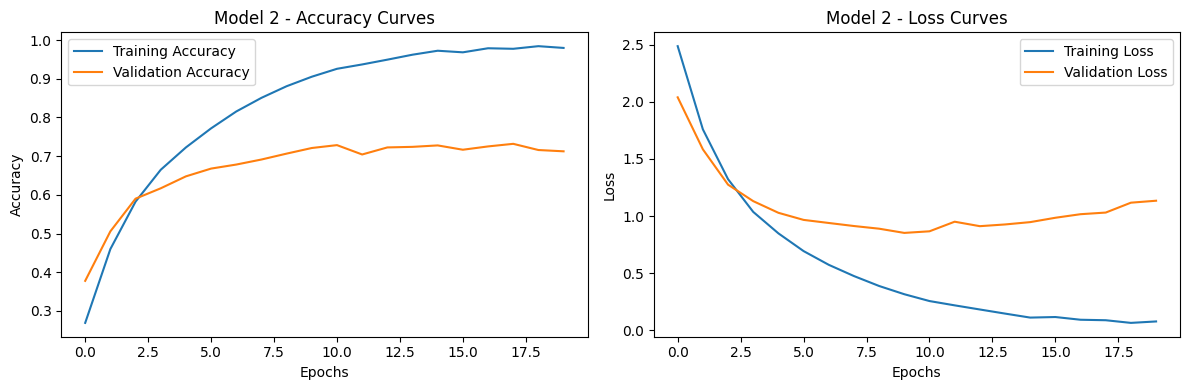

In [ ]:
# Plot the error and accuracy curves for the training data and validation data.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model2.history['accuracy'], label='Training Accuracy')
plt.plot(model2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Model 2 - Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(model2.history['loss'], label='Training Loss')
plt.plot(model2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Model 2 - Loss Curves')

plt.tight_layout()
plt.show()

> __Since the first NN model test accuarcy on validation data = 70.49% , second one = 68.9%, then the best NN model for this data is the first one.__

#### **5.4.The best NN model**

In [ ]:
# Saving the best NN model in a separate file
nn_model1.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Reload it in a separate file
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# To prevent overfitting by stopping training when the best validation performance reached
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
best_model.fit(train_images_normalized, train_labels, epochs=60 , callbacks=[early_stopping])

Epoch 1/60
420/420 [==============================] - 2s 5ms/step - loss: 0.4905 - accuracy: 0.8394
Epoch 2/60
420/420 [==============================] - 2s 5ms/step - loss: 0.3371 - accuracy: 0.8886
Epoch 3/60
420/420 [==============================] - 2s 5ms/step - loss: 0.2609 - accuracy: 0.9182
Epoch 4/60
420/420 [==============================] - 3s 8ms/step - loss: 0.2140 - accuracy: 0.9360
Epoch 5/60
420/420 [==============================] - 2s 5ms/step - loss: 0.1808 - accuracy: 0.9454
Epoch 6/60
420/420 [==============================] - 2s 5ms/step - loss: 0.1477 - accuracy: 0.9600
Epoch 7/60
420/420 [==============================] - 2s 5ms/step - loss: 0.1272 - accuracy: 0.9665
Epoch 8/60
420/420 [==============================] - 2s 5ms/step - loss: 0.1090 - accuracy: 0.9711
Epoch 9/60
420/420 [==============================] - 3s 6ms/step - loss: 0.0942 - accuracy: 0.9754
Epoch 10/60
420/420 [==============================] - 3s 7ms/step - loss: 0.0888 - accuracy: 0.9763

In [ ]:
# Calculating the loss , accuracy of test data
best_test_loss, best_test_accuracy = best_model.evaluate(test_images_normalized, test_labels)

print(f'Test Loss: {best_test_loss}')
print(f'Test Accuracy: {best_test_accuracy}')

105/105 [==============================] - 0s 2ms/step - loss: 1.7153 - accuracy: 0.7580
Test Loss: 1.7152513265609741
Test Accuracy: 0.7580357193946838


In [ ]:
# Making predictions on test data
# The model has predicted the label for each image in the testing set
predictions = best_model.predict(test_images_normalized)

105/105 [==============================] - 0s 2ms/step


In [ ]:
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
best_nn_f1_scores = f1_score(test_labels, predicted_classes, average='weighted')
print(f"Best NN model : \nAverage F-1 Score on Testing Dataset: {best_nn_f1_scores}")


Best NN model : 
Average F-1 Score on Testing Dataset: 0.7569281122474694


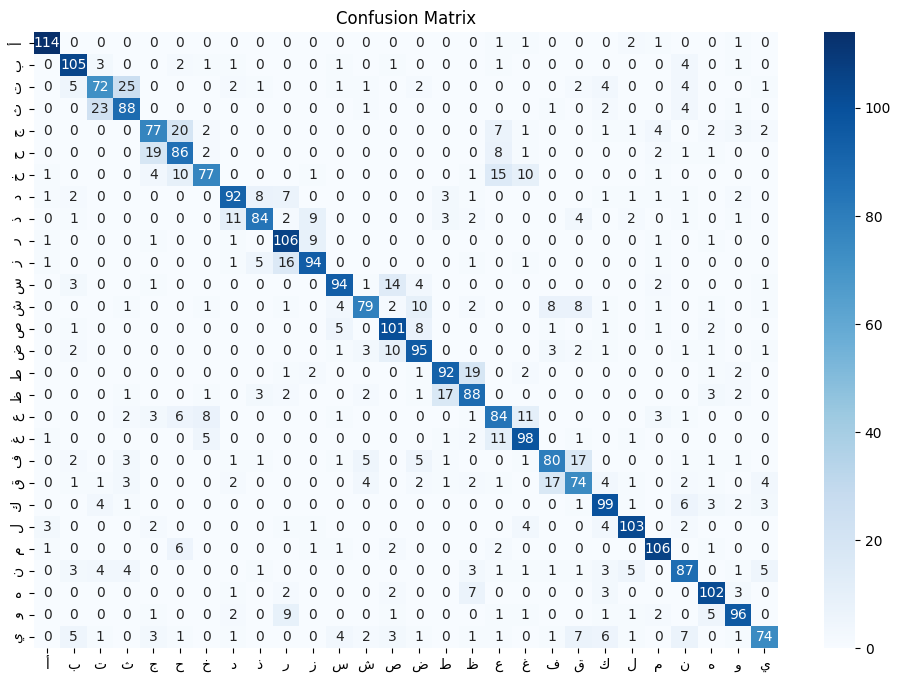

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_arabic, yticklabels=class_names_arabic)
plt.title('Confusion Matrix')
plt.show()

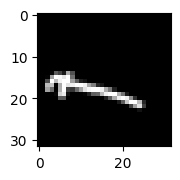


The predicted label : أ



<Figure size 640x480 with 0 Axes>

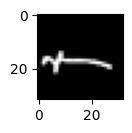


The predicted label : أ



<Figure size 640x480 with 0 Axes>

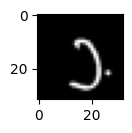


The predicted label : ب



<Figure size 640x480 with 0 Axes>

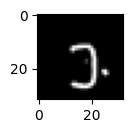


The predicted label : ب



<Figure size 640x480 with 0 Axes>

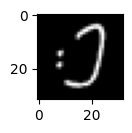


The predicted label : ث



<Figure size 640x480 with 0 Axes>

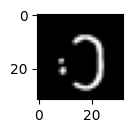


The predicted label : ت



<Figure size 640x480 with 0 Axes>

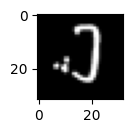


The predicted label : ث



<Figure size 640x480 with 0 Axes>

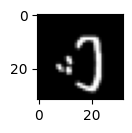


The predicted label : ث



<Figure size 640x480 with 0 Axes>

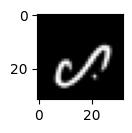


The predicted label : ج



<Figure size 640x480 with 0 Axes>

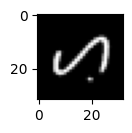


The predicted label : ج



<Figure size 640x480 with 0 Axes>

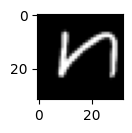


The predicted label : ح



<Figure size 640x480 with 0 Axes>

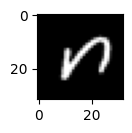


The predicted label : ح



<Figure size 640x480 with 0 Axes>

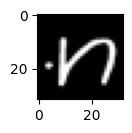


The predicted label : خ



<Figure size 640x480 with 0 Axes>

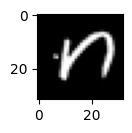


The predicted label : ح



<Figure size 640x480 with 0 Axes>

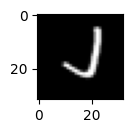


The predicted label : ط



<Figure size 640x480 with 0 Axes>

In [ ]:
# Displaying the test predictions
plt.figure(figsize=(10,10))
for i in range(0 , 15 ) :
  plt.subplot(3, 5, i + 1)
  display_image(test_images_normalized.iloc[i, :].values)

  label_of_index  = predicted_classes[i]
  print (f"\nThe predicted label : {class_names_arabic[label_of_index]}\n")

  plt.tight_layout()
  plt.show()

### **6.Comparing all models**

In [ ]:
print(f"\nSVM model : \nTesting Average f1-score : {average_svm_f1}")
print(f"\nKNN model : \nTesting Average f1-score : {knn_f1_scores}")
print(f"\nBest NN model : \nTesting Average f1-score : {best_nn_f1_scores}")


SVM model : 
Testing Average f1-score : 0.6536078692883533

KNN model : 
Testing Average f1-score : 0.5607659578147269

Best NN model : 
Testing Average f1-score : 0.7569281122474694


>__It is obvious thet the NN model is the best model for this data.__